In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
import folium

In [3]:
df = pd.read_csv('./datasets/modeling.csv', index_col = 0)

In [4]:
m = folium.Map(zoom_start= 100)
df.apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), 
                                       radius = 1, 
                                       opacity = .5).add_to(m), axis = 1)
m

#https://www.kaggle.com/subinium/how-to-use-folium-geospatial-data

**Distribution of pirate encounters**

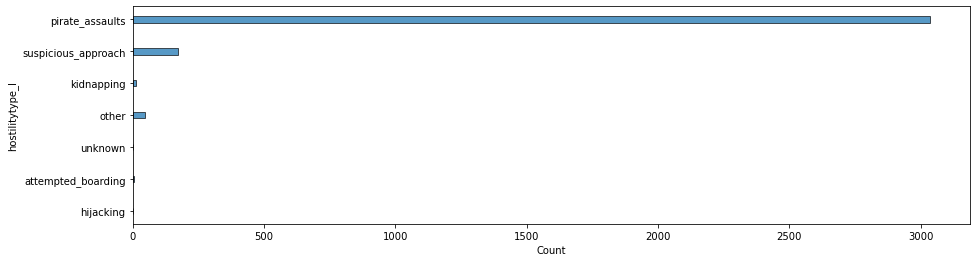

In [5]:
plt.figure(figsize = (15,4))
sns.histplot(data = df, y = 'hostilitytype_l', shrink = .2);

**Pirate attacks by year**

<Figure size 1800x360 with 0 Axes>

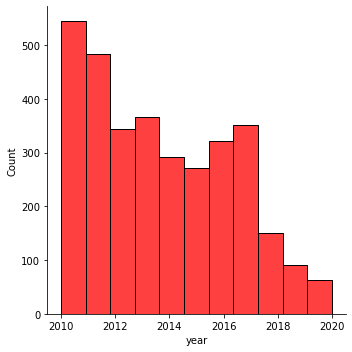

In [6]:
plt.figure(figsize = (25,5))
sns.displot(data = df, x = 'year',color = 'red', bins = len(df['year'].value_counts()));

There is a huge spike in attacks as we move in the 2000's with an even larger increase in the early 2010's. 

In [7]:
df.hostilitytype_l.value_counts()

pirate_assaults        3035
suspicious_approach     172
other                    48
kidnapping               13
attempted_boarding        6
unknown                   3
hijacking                 1
Name: hostilitytype_l, dtype: int64

# go back to cleaning notebook and remove og subreg column

![Subregions]('./img/Subregions.png')

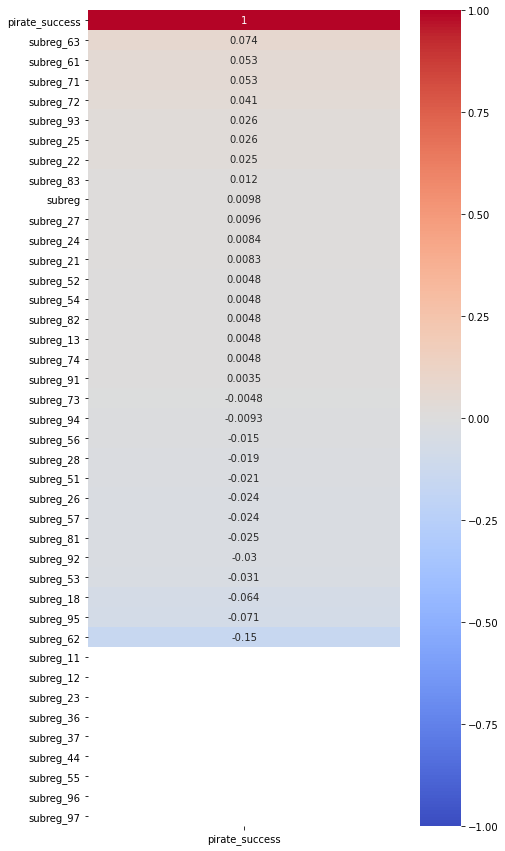

In [8]:
#Show which subregions pirates are most successfull in. 

sub_reg_cols = [x for x in df.columns if x[:6] in 'subreg' or x == 'pirate_success']

plt.figure(figsize=(7, 15))
sns.heatmap(df[sub_reg_cols].corr()[['pirate_success']].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

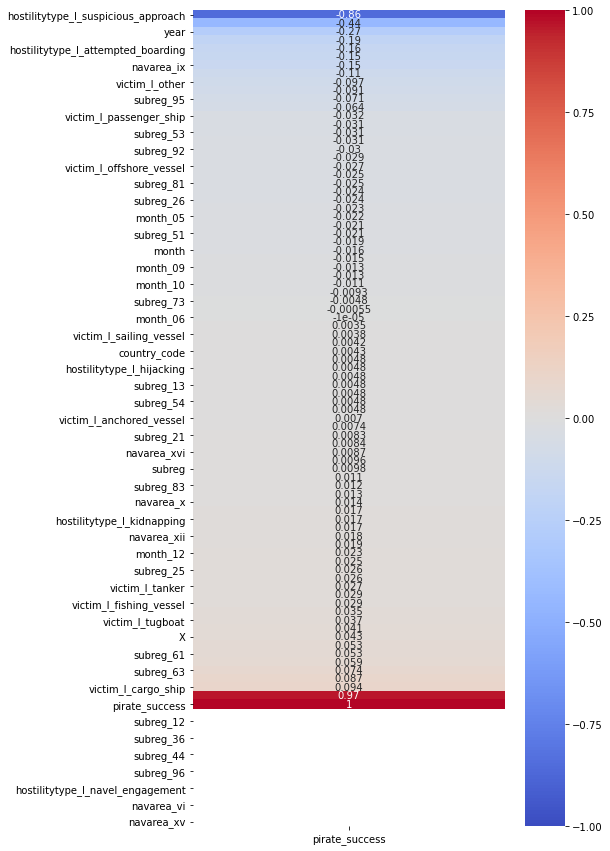

In [9]:
plt.figure(figsize=(7, 15))
sns.heatmap(df.corr()[['pirate_success']].sort_values('pirate_success'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

# Months

**Pirate success by month**

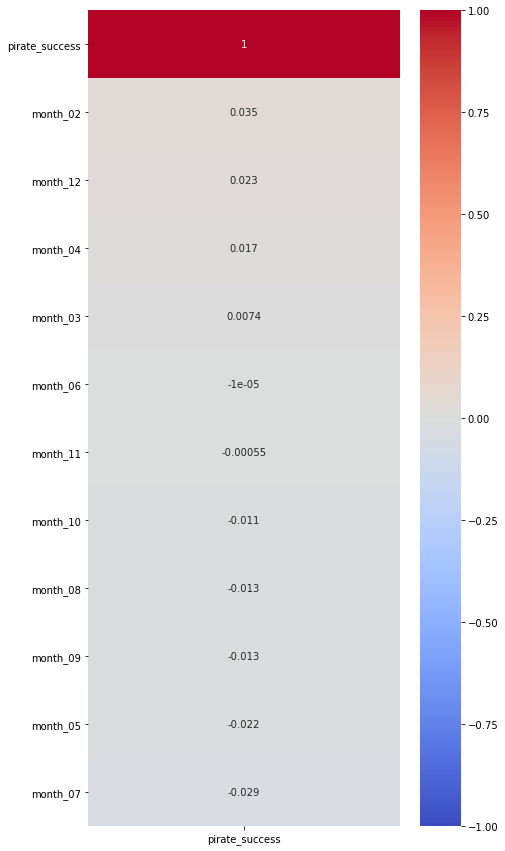

In [10]:
#Show which subregions pirates are most successfull in. 

month_cols = [x for x in df.columns if x[:5] in 'month' or x == 'pirate_success'][1:]

plt.figure(figsize=(7, 15))
sns.heatmap(df[month_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Out of all months pirates are having greater success in December and February. The correlations are not too strong however so we're inclined to see what other factors contribute to pirate success.

**Distribution of pirate attacks by month**

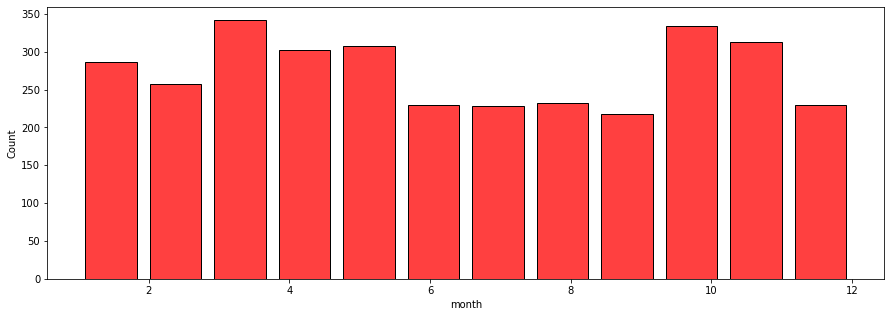

In [11]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'month', shrink = .8, bins = 12, color = 'red');

Pirate attacks remain generally consistent across months. With an exception of Feburary other months don't show a vast difference. Our inital assumption when looking at the month of February is that since its the one month that has the least amount of days, this may equate to less travel or merchant activity which leads to lower opportunites of pirate attacks. 

**Victim types**

Distribution of victims:

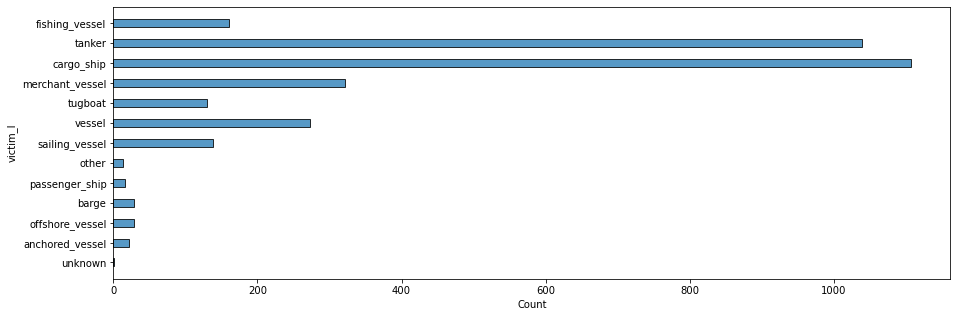

In [12]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, y = 'victim_l', shrink = .4);

Pirate Success based on victim type:

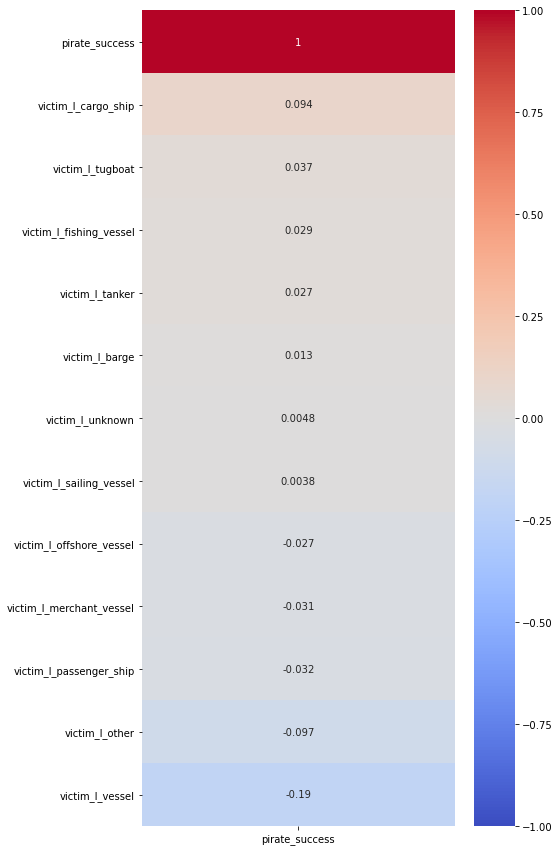

In [13]:
#Show which subregions pirates are most successfull in. 

victim_cols = [x for x in df.columns if x[:5] in 'victim_l' or x == 'pirate_success'][1:]

plt.figure(figsize=(7, 15))
sns.heatmap(df[victim_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Merchant vessels get attacked more than any other vessel by a wide margin. Cargo ships come in second. Both of these observations are not surprising given the profit to be gained. Attacks on sailing vessels, tugboats and tankers are interesting as they would seem to be less profitable endeavors. 

In [ ]:
#Map showing areas where passenger_ship and sailing_vessel are getting hit.

In [14]:
#Map showing areas where passenger_ship and sailing_vessel are getting hit.
m = folium.Map()
df[(df['victim_l_passenger_ship'] == 1) | (df['victim_l_sailing_vessel'] == 1)].apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), radius = 1).add_to(m), axis = 1)
folium.TileLayer('CartoDB dark_matter').add_to(m)
m

In [16]:
m = folium.Map()
for i, coord in df.iterrows():
    if coord.year <= 2013:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'red',
                            opacity = .5).add_to(m)
    elif coord.year < 2016 and coord.year > 2013:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'yellow',
                            opacity = .5).add_to(m)
    elif coord.year >= 2016:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'blue',
                            opacity = .5).add_to(m)

folium.TileLayer('Stamen Terrain').add_to(m)
m

#https://www.kaggle.com/anthaus/tuto-draw-nice-maps-with-folium
#https://deparkes.co.uk/2016/06/10/folium-map-tiles/